In [5]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
import argparse
from IPython.display import clear_output
from numpy.random import random_sample
import matplotlib
from astropy.io import fits
from matplotlib.colors import LogNorm
import pickle

import pandas as pd
import seaborn as sns

import ngmix
from ngmix.observation import Observation, ObsList, MultiBandObsList
import numpy as np
from numpy import array
from numpy.random import uniform as urand

from scipy.optimize import curve_fit
from scipy import stats

from matplotlib import colors, ticker, cm

from scipy.optimize import least_squares


In [145]:
def moffat_image(x, hlr, beta, pixel_size = 0.168):
    moffat = galsim.Moffat(beta, half_light_radius = hlr)
    #print(global_nx, global_ny)
    return moffat.drawImage(scale = pixel_size, nx = global_nx, ny = global_ny).array.reshape(-1)[x]

In [146]:
def residual(coeffs, y, t):
    #print(t)
    residual_image = y[t] - moffat_image(t, coeffs[0], coeffs[1])
    return residual_image
                                               

In [152]:
moffat_y = galsim.Moffat(4.0, half_light_radius = 0.5)
image_y = moffat_y.drawImage(scale = 0.168, nx = 100, ny = 100).array.reshape(-1)
global_nx = 100
global_ny = 100

In [153]:
residual([0.6, 3.5],true_image, 10 )

-2.20442e-09

In [154]:
x = np.arange(len(image_y))

In [155]:
res_1 = least_squares(residual, [0.6, 3.5] ,args = (image_y,x), method = 'trf', xtol = 1e-10)

In [156]:
print(res_1)

 active_mask: array([0., 0.])
        cost: 2.1071251508318555e-17
         fun: array([6.6866908e-11, 7.3682137e-11, 7.1628599e-11, ..., 7.3163448e-11,
       7.2657734e-11, 5.7551339e-11], dtype=float32)
        grad: array([1.16806645e-09, 5.31761637e-12])
         jac: array([[-1.98024082e-07, -2.62386042e-08],
       [-1.70950329e-07, -2.52410910e-08],
       [-1.48209509e-07, -2.27866277e-08],
       ...,
       [-1.70060062e-07, -2.85582669e-08],
       [-1.98263805e-07, -3.82107288e-08],
       [-2.25064682e-07, -4.24802771e-08]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 6
        njev: 6
  optimality: 1.1680664481397223e-09
      status: 1
     success: True
           x: array([0.5       , 4.00000014])


In [157]:
catalog  = pd.read_csv("PSFSTAR.csv",header = 0)



In [186]:
hlr_list = []
beta_list = []

In [221]:

pixel_scale = 0.168
patch_number = 1




for i in range(patch_number*10000, (patch_number+1)*10000):
    
#     truthfile = catalog['star_filename'][i]
#     truth_image = galsim.Image(fits.open(truthfile)[1].data)
#     truth_image.scale = 0.168
#     truth_hlr = truth_image.calculateHLR()
    
#     global_nx = truth_image.array.shape[0]
#     global_ny = truth_image.array.shape[1]
    
    
#     image_y = truth_image.array.reshape(-1)
#     #print(residual([0.6, 3.5],image_y, 10 ))
#     x = np.arange(len(image_y))
#     res_1 = least_squares(residual, [truth_hlr, 3.5] ,args = (image_y,x), )

    
    
    
    
    
    
    

    modelfile = catalog['psf_filename'][i]
    model_image = galsim.Image(fits.open(modelfile)[0].data)
    model_image.scale = 0.168
    #model_sigma = galsim.hsm.FindAdaptiveMom(model_image).moments_sigma
    
    #model_psf = galsim.InterpolatedImage(model_image,scale = pixel_scale)
    model_hlr = model_image.calculateHLR()
    
    global_nx = model_image.array.shape[0]
    global_ny = model_image.array.shape[1]
    
    
    image_y = model_image.array.reshape(-1)
    #print(residual([0.6, 3.5],image_y, 10 ))
    x = np.arange(len(image_y))
    res_1 = least_squares(residual, [model_hlr, 3.5] ,args = (image_y,x), method = 'trf', xtol = 1e-10 )

    hlr_list.append(res_1.x[0])
    beta_list.append(res_1.x[1])
    
    
    
    #print(res_1)
    
    
    #print(truth_image.array.shape, model_image.array.shape)
    

    #clear_output()
    print(i)







10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
1016

11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
1153

12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
12748
12749
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
1290

14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
1426

15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15509
15510
15511
15512
15513
15514
15515
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
1563

16837
16838
16839
16840
16841
16842
16843
16844
16845
16846
16847
16848
16849
16850
16851
16852
16853
16854
16855
16856
16857
16858
16859
16860
16861
16862
16863
16864
16865
16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
1700

18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
18224
18225
18226
18227
18228
18229
18230
18231
18232
18233
18234
18235
18236
18237
18238
18239
18240
18241
18242
18243
18244
18245
18246
18247
18248
18249
18250
18251
18252
18253
18254
18255
18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
1837

19573
19574
19575
19576
19577
19578
19579
19580
19581
19582
19583
19584
19585
19586
19587
19588
19589
19590
19591
19592
19593
19594
19595
19596
19597
19598
19599
19600
19601
19602
19603
19604
19605
19606
19607
19608
19609
19610
19611
19612
19613
19614
19615
19616
19617
19618
19619
19620
19621
19622
19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
1973

In [222]:
print(len(beta_list))

20000


In [220]:

pixel_scale = 0.168
patch_number = 1


for i in range(patch_number*10000, (patch_number+1)*10000):
    
    truthfile = catalog['star_filename'][i]
    truth_image = galsim.Image(fits.open(truthfile)[1].data)
    truth_image.scale = 0.168
    truth_hlr = truth_image.calculateHLR()
    print(truth_hlr)
#     plt.imshow(truth_image.array)
#     plt.colorbar()
#     plt.show()
    
    global_nx = truth_image.array.shape[0]
    global_ny = truth_image.array.shape[1]
    
    
    image_y = truth_image.array.reshape(-1)
    x = np.arange(len(image_y))
    res_1 = least_squares(residual, [0.3756, 3.5] , args = (image_y,x),  method = 'trf', xtol = 1e-4)
    print(res_1)
    

0.37565942021996473


GalSimFFTSizeError: drawFFT requires an FFT that is too large.
The required FFT size would be 12138 x 12138, which requires 3.29 GB of memory.
If you can handle the large FFT, you may update gsparams.maximum_fft_size.

In [205]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
sns.color_palette("Set2")
cmap = sns.color_palette("colorblind")


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 15

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.pyplot as plt

plt.gcf().subplots_adjust(bottom=0.15)

<Figure size 1800x1200 with 0 Axes>

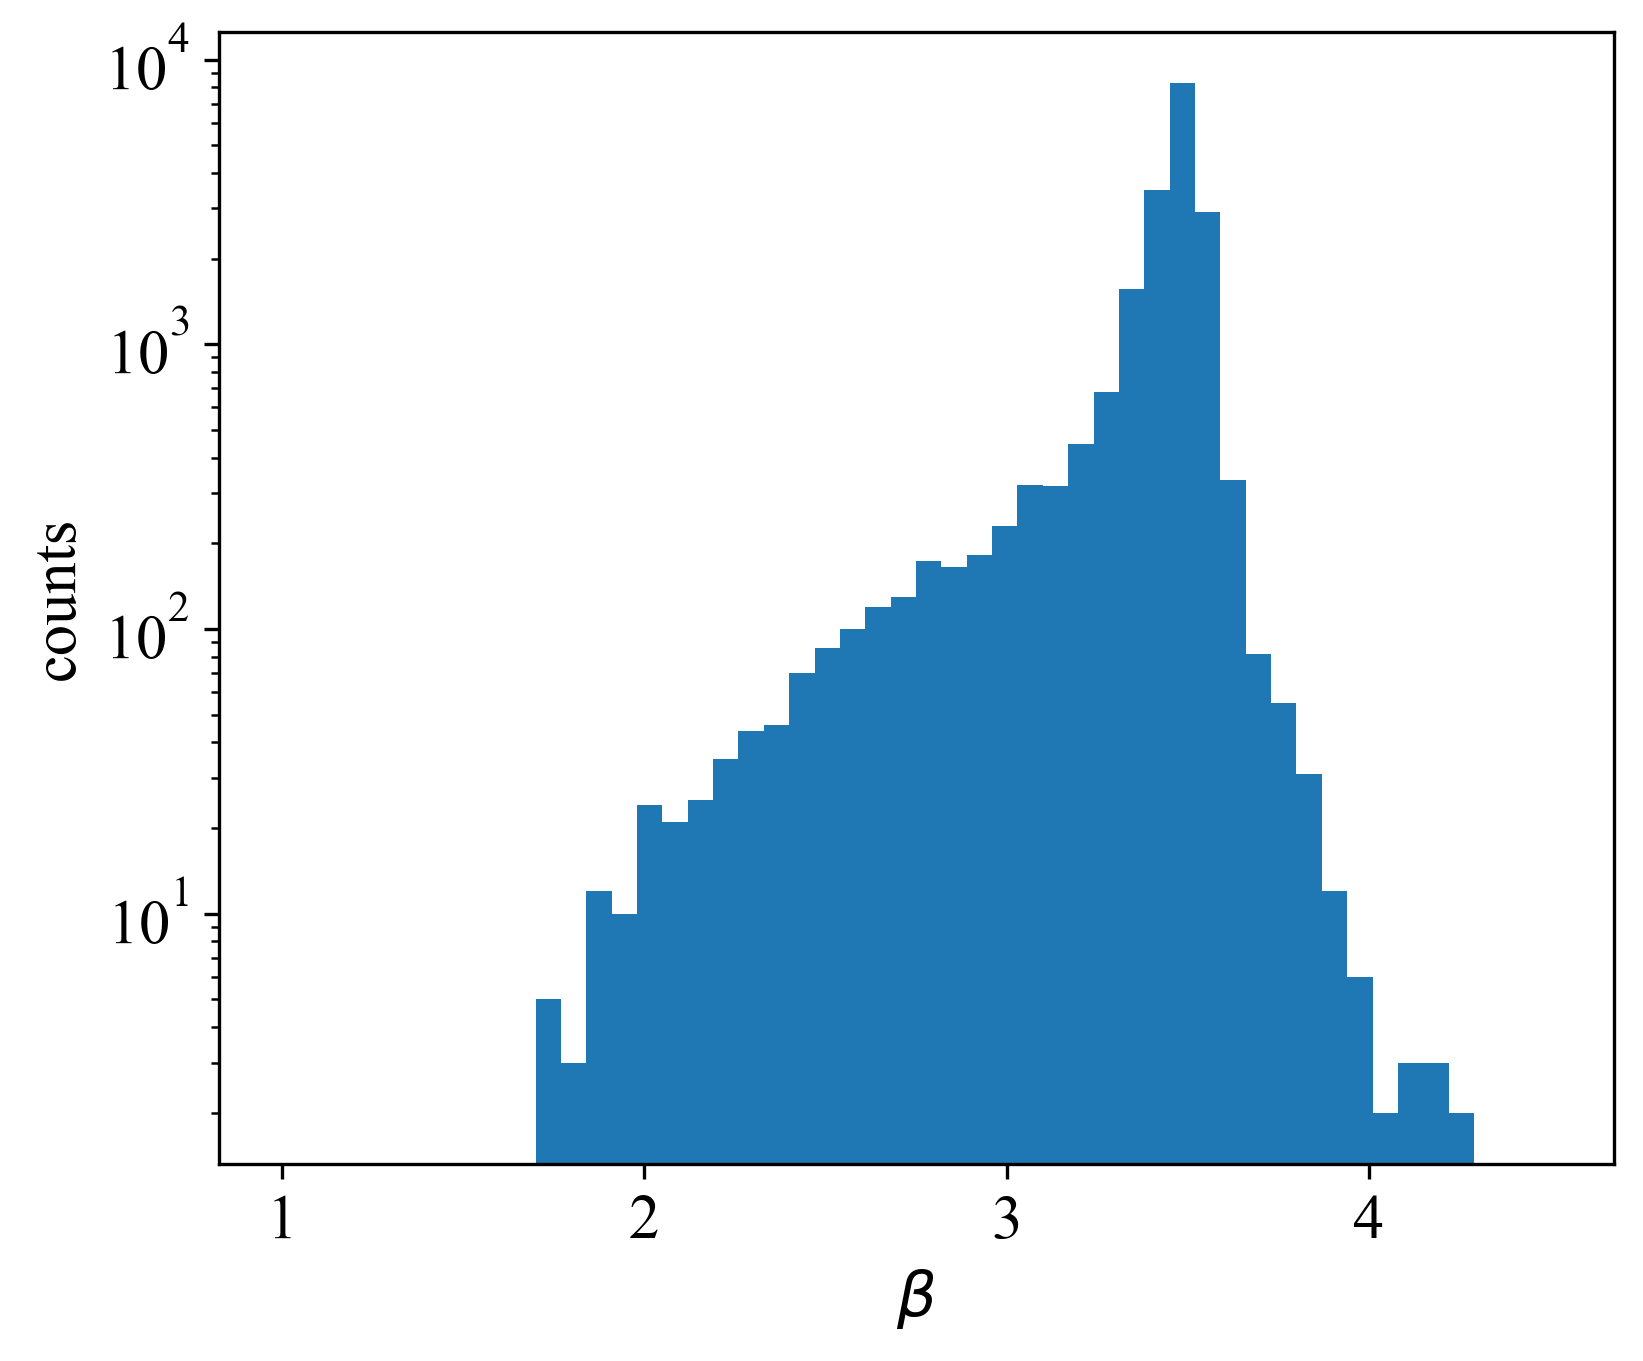

In [223]:
plt.figure(figsize = (6,5))
plt.hist(beta_list, bins = 50, range = [1.0, 4.5])
plt.yscale('log')
plt.xlabel(r'$\beta$')
plt.ylabel('counts')
#plt.grid()

plt.show()

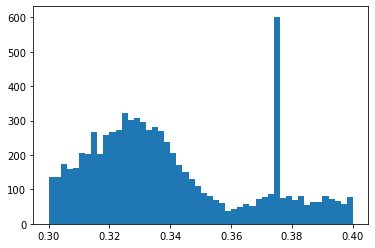

In [191]:
plt.hist(hlr_list, bins = 50, range = [0.3, 0.4])
plt.show()

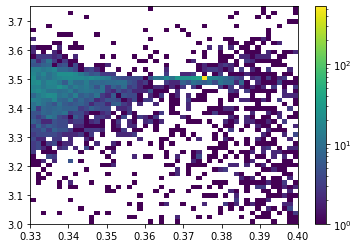

In [194]:
plt.hist2d(hlr_list, beta_list, bins = (50,50), range = [[0.33, 0.4], [3.0, 3.75]], norm = LogNorm() )
plt.colorbar()
plt.show()

In [224]:
print(np.mean(beta_list))

3.3940274498059972


In [228]:

print(galsim.hsm.FindAdaptiveMom(image))

NameError: name 'image' is not defined